In [1]:
import numpy as np
import pandas as pd
import csv
low_memory=False
%matplotlib inline


In [2]:
colunas = [0, 1, 3, 4, 7, 8, 10, 12, 14, 16, 18]
filename = r'C:/Users/User/Desktop/bases_de_dados/pnad_covid19_202011_trabalho_BR_GR_UF.xlsx'
df = pd.read_excel(filename, usecols=colunas)

In [3]:
df.sample(10)

,Indicador,Nível Territorial,Variável de abertura 1,Categoria de abertura 1,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro
1782,CV - Rendimento real domiciliar per capita méd...,País,Recebimento de BPC,Total,0.901688,0.896530,0.888769,0.875520,0.865610,0.896149,0.882702
2362,Distribuição das pessoas fora da força de trab...,País,Recebimento de Bolsa Família,Alguém recebe Bolsa Família,12.377608,7.866519,6.103086,5.167351,4.647749,8.085506,9.159910
11542,Pessoas responsáveis pelo domicílio (mil pessoas),Grande Região,Nível de instrução,Sem instrução ao fundamental incompleto,3200.949508,3229.154166,3241.825794,3241.130931,3233.453930,3228.801454,3206.631774
5232,Distribuição das pessoas fora da força de trab...,Grande Região,Sexo,Mulher,60.838280,61.073974,61.282704,61.759366,62.227017,62.323304,62.582238
2229,Distribuição das pessoas não ocupadas que não ...,País,Recebimento de seguro desemprego,Total,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2040,Pessoas responsáveis pelo domicílio (mil pessoas),País,Nível de instrução,Médio completo ao superior incompleto,22566.037292,22653.965478,22747.393368,22853.471998,22863.029182,22936.948906,22959.085442
3964,CV - Média do rendimento proveniente do auxíli...,Grande Região,-,-,0.803073,0.958853,0.781725,0.746979,0.778122,0.949082,1.083264
1197,CV - Distribuição das pessoas ocupadas e não a...,País,Posição na ocupação e categoria do emprego,Empregador,7.704286,6.755010,7.043493,7.539938,8.340413,8.897466,9.467388
13597,Pessoas ocupadas com rendimento do trabalho e ...,Grande Região,-,-,152.579713,190.548780,213.700688,219.316794,236.984424,254.543633,261.024268
8392,CV - Distribuição das pessoas ocupadas (%),Grande Região,Grupamentos ocupacionais,"Trabalhadores dos serviços, vendedores dos com...",1.602084,1.614109,1.601845,1.629025,1.649678,1.598204,1.576365


In [4]:
df.rename(columns={'Variável de abertura 1': 'Variavel',
                   'Categoria de abertura 1': 'Categoria',
                   'Nível Territorial': 'Territorio'
                  }, inplace=True)

In [5]:
df.sample(10)

,Indicador,Territorio,Variavel,Categoria,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro
13241,CV - Pessoas ocupadas (%),Grande Região,Grupamentos ocupacionais,Trabalhadores de apoio administrativo,4.146522,3.871032,3.947664,3.674822,3.455047,3.507089,3.458884
8277,Pessoas ocupadas e afastadas (mil pessoas),Grande Região,Sexo,Mulher,4452.868165,3447.073568,2246.570160,1618.074240,1305.036103,1166.591033,1040.563929
17,CV - População Residente (%),País,Sexo,Total,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4942,Pessoas de 14 anos ou mais de idade (mil pessoas),Grande Região,Sexo,Total,45413.096441,45463.385596,45428.536609,45458.889987,45527.443783,45524.074513,45564.781925
4523,CV - Distribuição das pessoas responsáveis pel...,Grande Região,Nível de instrução,Médio completo ao superior incompleto,2.208241,2.043750,1.984833,2.000825,2.024959,2.059188,2.179380
10186,CV - Nível da ocupação (%),Grande Região,Sexo,Mulher,0.749681,0.737259,0.773249,0.738030,0.729214,0.736153,0.730656
5621,Percentual de pessoas desocupadas ou não ocupa...,Grande Região,Grupos de idade,14 a 29 anos,55.685703,57.606884,59.266265,59.117958,58.725157,57.592977,57.201507
3541,CV - Pessoas ocupadas (%),Grande Região,Grupamentos de atividade,Indústrias de transformação,7.057452,6.257237,5.945937,5.642770,5.613881,5.636188,5.690304
10473,CV - Percentual de pessoas não ocupadas que nã...,Grande Região,Sexo,Homem,2.909165,2.817997,2.561087,2.722859,2.719477,2.935118,3.013579
8449,CV - Distribuição das pessoas ocupadas (%),Grande Região,Grupamentos de atividade,Outros serviços,3.448436,3.472843,3.758888,3.487338,3.441856,3.308704,3.340687


In [6]:
df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" and Categoria != "Total1"')[['Categoria','Maio', 'Junho','Julho','Agosto','Setembro','Outubro','Novembro']].head(10)
#A tabela abaixo apresenta o total de pessoas empregadas de Maio/20 a Novembro/20 de acordo com o PNAD

,Categoria,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro
132,Total,84404.201116,83449.134741,81483.617297,82141.164969,82934.240754,84134.092209,84660.818224
133,Homem,48283.892895,47914.336430,47468.935840,48013.788774,48557.512881,49192.315591,49446.471600
134,Mulher,36120.308220,35534.798311,34014.681457,34127.376195,34376.727874,34941.776618,35214.346624
136,Branca,39243.102086,38669.975101,37942.602629,38255.428992,38647.634682,39127.887077,39343.041065
137,Preta ou parda,44114.750386,43831.799407,42624.287230,42956.595585,43361.108760,44093.849010,44385.766201
138,Total,84404.201116,83449.134741,81483.617297,82141.164969,82934.240754,84134.092209,84660.818224
139,14 a 29 anos,21503.088827,21228.223874,20667.262080,20863.142606,21215.998401,21542.305393,21581.528909
140,30 a 49 anos,43745.857227,43234.671172,42492.233925,42792.796256,43144.487392,43745.812610,44056.461404
141,50 a 59 anos,13574.290349,13484.952077,13131.246791,13205.824160,13277.136078,13427.672524,13550.081350
142,60 anos ou mais,5580.964713,5501.287618,5192.874501,5279.401947,5296.618883,5418.301682,5472.746561


In [7]:
df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" and Categoria == "Homem"')[['Categoria','Maio', 'Junho','Julho','Agosto','Setembro','Outubro','Novembro']].melt(id_vars=["Categoria"], 
        var_name="Mes", value_name="Empregados")

,Categoria,Mes,Empregados
0,Homem,Maio,48283.892895
1,Homem,Junho,47914.336430
2,Homem,Julho,47468.935840
3,Homem,Agosto,48013.788774
4,Homem,Setembro,48557.512881
5,Homem,Outubro,49192.315591
6,Homem,Novembro,49446.471600


In [8]:
Ocupados = df.query('Indicador == "Pessoas ocupadas (mil pessoas)" and Territorio == "País" ')[['Categoria', 'Variavel', 'Maio',
    'Junho','Julho','Agosto','Setembro','Outubro','Novembro']].melt(id_vars=["Categoria","Variavel"], 
        var_name="Mes", value_name="Empregados")


Text(0, 0.5, 'Qtd (x mil)')

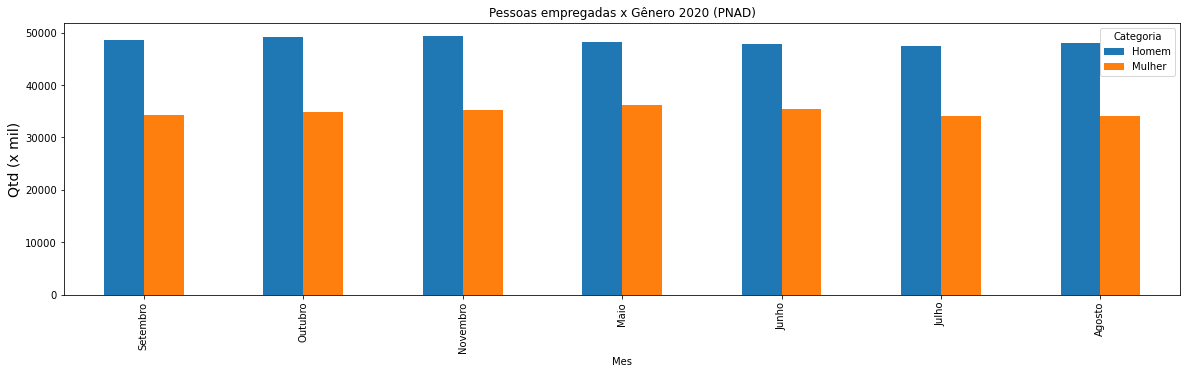

In [9]:
Ocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=False).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Gênero 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)


In [10]:
Ocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().sort_values()


Mes       Categoria
Julho     Mulher       34014.681457
Agosto    Mulher       34127.376195
Setembro  Mulher       34376.727874
Outubro   Mulher       34941.776618
Novembro  Mulher       35214.346624
Junho     Mulher       35534.798311
Maio      Mulher       36120.308220
Julho     Homem        47468.935840
Junho     Homem        47914.336430
Agosto    Homem        48013.788774
Maio      Homem        48283.892895
Setembro  Homem        48557.512881
Outubro   Homem        49192.315591
Novembro  Homem        49446.471600
Name: Empregados, dtype: float64

In [11]:
Desocupados = df.query('Indicador == "Pessoas desocupadas (mil pessoas)" and Territorio == "País" ')[['Categoria', 'Variavel', 'Maio',
    'Junho','Julho','Agosto','Setembro','Outubro','Novembro']].melt(id_vars=["Categoria","Variavel"], 
        var_name="Mes", value_name="Empregados")


Text(0, 0.5, 'Qtd (x mil)')

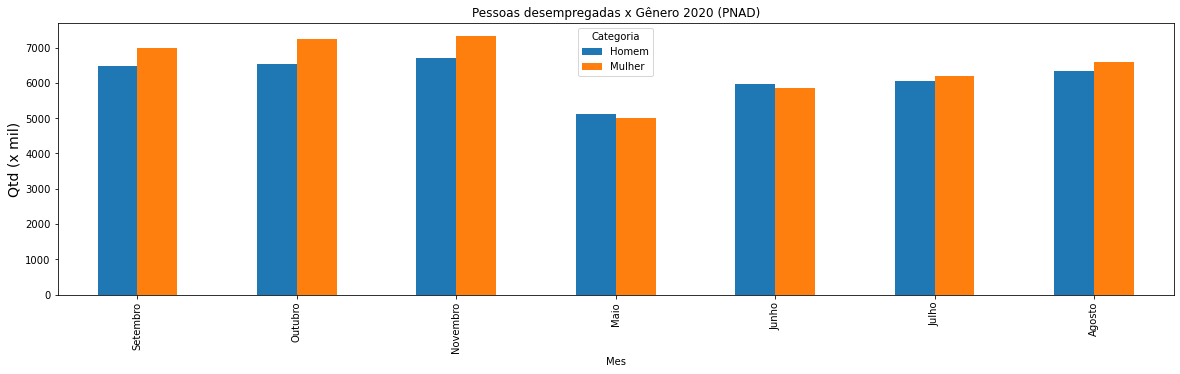

In [12]:
Desocupados.query('Categoria != "Total1" and Variavel == "Sexo" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=False).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Gênero 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

Text(0, 0.5, 'Qtd (x mil)')

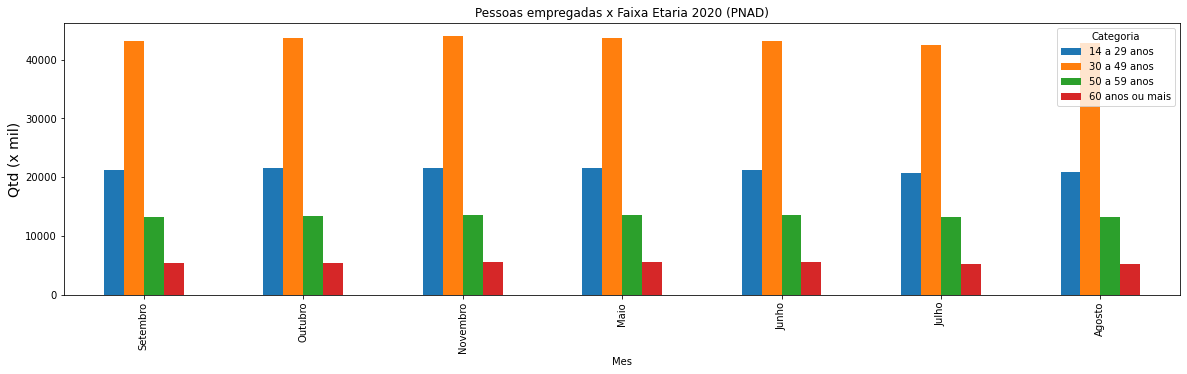

In [13]:
Ocupados.query('Variavel == "Grupos de idade" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=False).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Faixa Etaria 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

Text(0, 0.5, 'Qtd (x mil)')

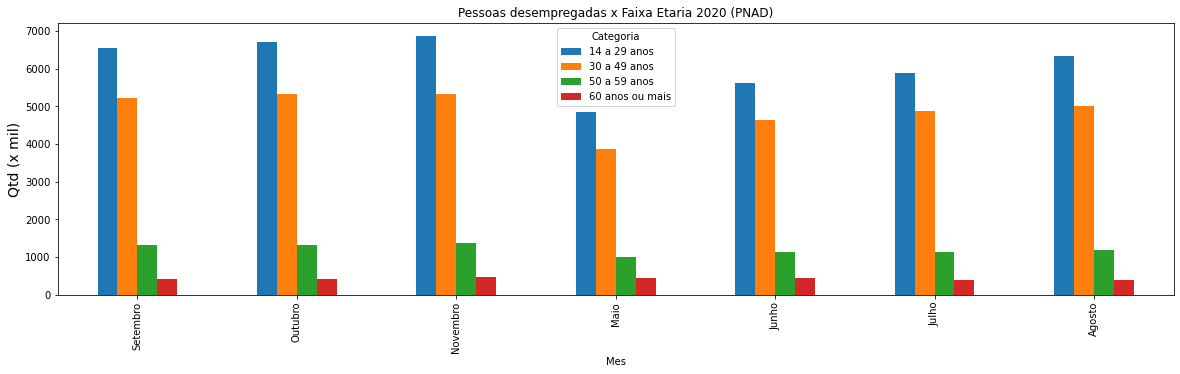

In [14]:
Desocupados.query('Variavel == "Grupos de idade" and Categoria != "Total"').groupby(['Mes',
                    'Categoria']).Empregados.sum().unstack().sort_values(by = 'Mes', ascending=False).plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Faixa Etaria 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

Text(0, 0.5, 'Qtd (x mil)')

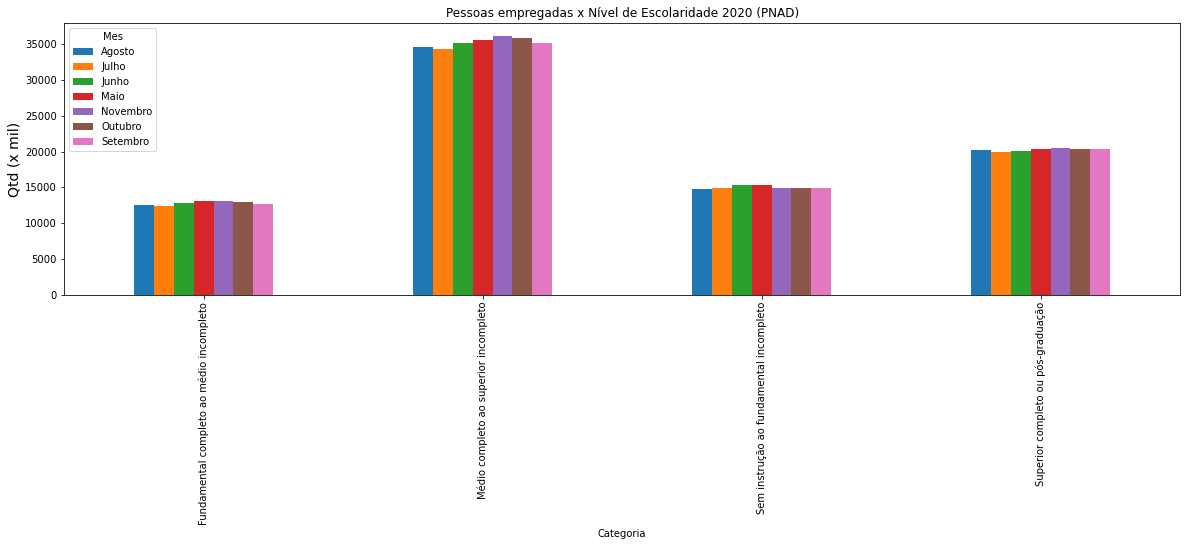

In [15]:
Ocupados.query('Variavel == "Nível de instrução" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Nível de Escolaridade 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

Text(0, 0.5, 'Qtd (x mil)')

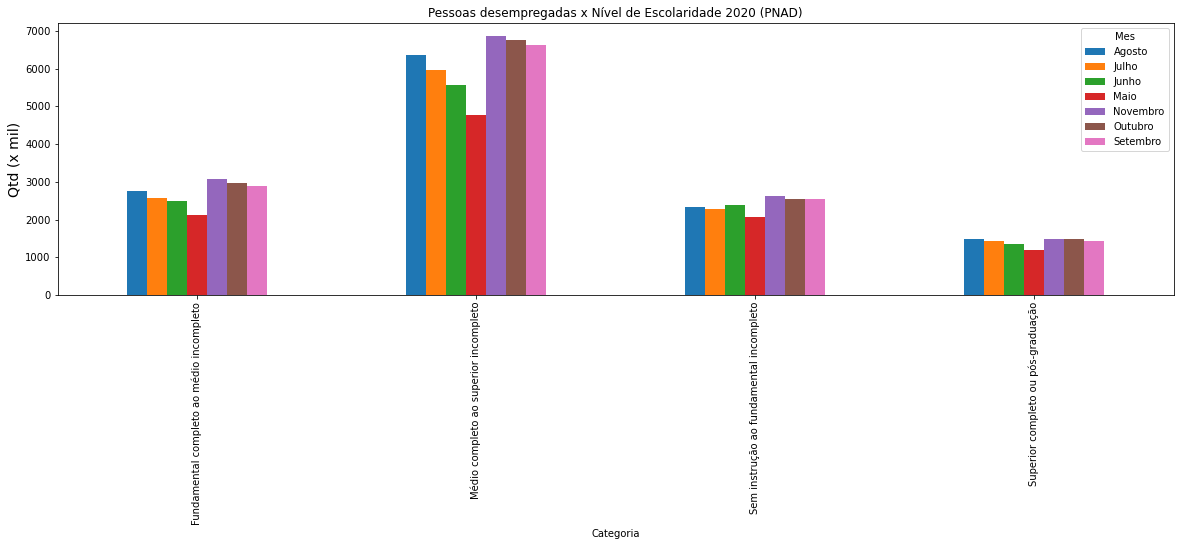

In [16]:
Desocupados.query('Variavel == "Nível de instrução" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().sort_values().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas desempregadas x Nível de Escolaridade 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

Text(0, 0.5, 'Qtd (x mil)')

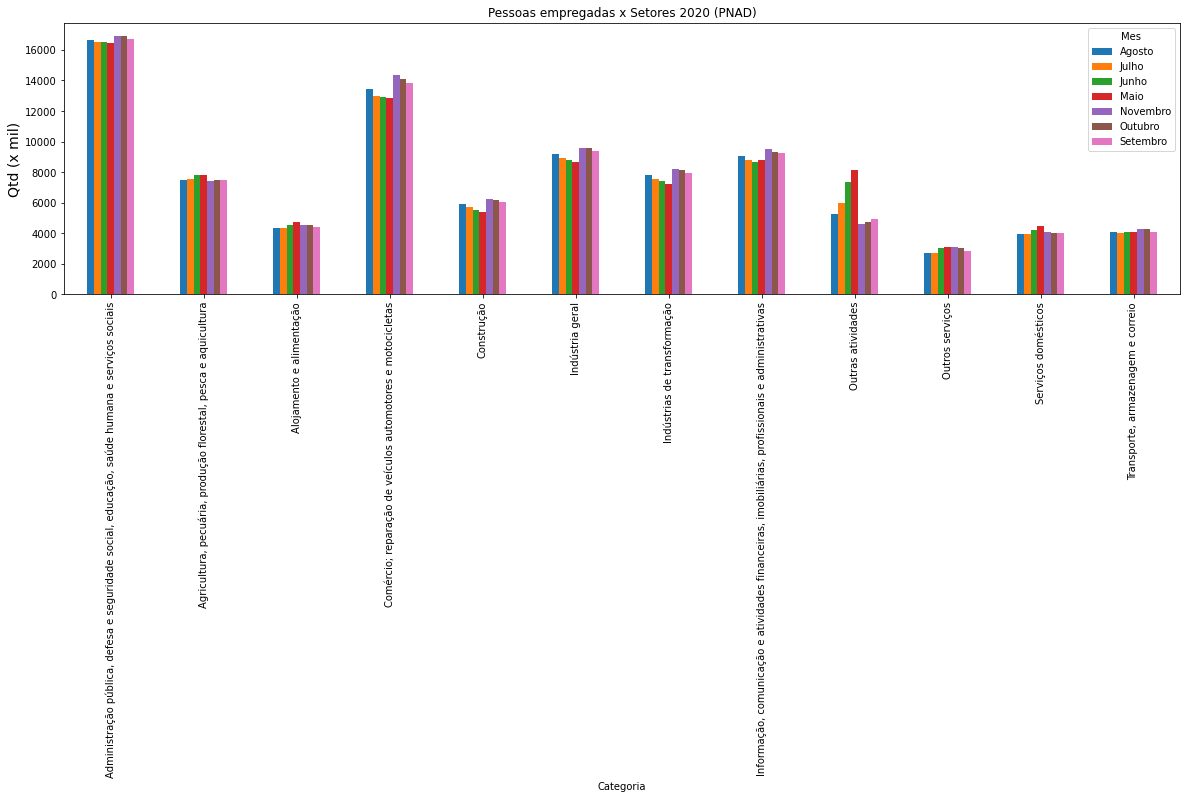

In [17]:
Ocupados.query('Variavel == "Grupamentos de atividade" and Categoria != "Total"').groupby(['Categoria',
                    'Mes']).Empregados.sum().unstack().plot(kind='bar', figsize = (20,5),
                        title = 'Pessoas empregadas x Setores 2020 (PNAD)').set_ylabel('Qtd (x mil)',fontsize=14)

In [19]:
colunas = ['competência','saldomovimentação','seção','graudeinstrução', 'idade', 'sexo','tipomovimentação','salário','raçacor']

novembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202011.txt',delimiter=';', usecols=colunas)
dezembro20 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202012.txt',delimiter=';', usecols=colunas)
janeiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202101.txt',delimiter=';', usecols=colunas)
fevereiro21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202102.txt',delimiter=';', usecols=colunas)
marco21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202103.txt',delimiter=';', usecols=colunas)
abril21 = pd.read_csv('C:/Users/User/Desktop/bases_de_dados/CAGEDMOV202104.txt',delimiter=';', usecols=colunas)

movimentacao = pd.concat([novembro20, dezembro20, janeiro21, fevereiro21, marco21, abril21]) 


             

In [20]:
movimentacao.sample(10)

,competência,seção,saldomovimentação,graudeinstrução,idade,raçacor,sexo,tipomovimentação,salário
2327658,202012,G,1,7,28.0,1,1,20,1410.680054
502921,202103,G,-1,9,46.0,1,1,40,3602.290039
1422365,202102,Q,1,7,47.0,3,3,20,1442.459961
444783,202012,F,-1,5,51.0,1,1,31,1885.400024
1722202,202011,G,1,7,21.0,6,3,20,1045.000000
2499784,202102,G,-1,7,21.0,1,1,40,1244.589966
2092680,202103,C,1,7,23.0,3,3,20,1268.239990
1442074,202102,H,1,7,23.0,1,1,20,1854.770020
1452057,202012,F,-1,2,35.0,3,1,31,1776.000000
163944,202011,H,1,7,19.0,3,3,20,1243.949951


In [21]:
movimentacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17162293 entries, 0 to 2642598
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   competência        int64  
 1   seção              object 
 2   saldomovimentação  int64  
 3   graudeinstrução    int64  
 4   idade              float64
 5   raçacor            int64  
 6   sexo               int64  
 7   tipomovimentação   int64  
 8   salário            float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.3+ GB


(Text(0, 0.5, 'Qtd (milhões)'),)

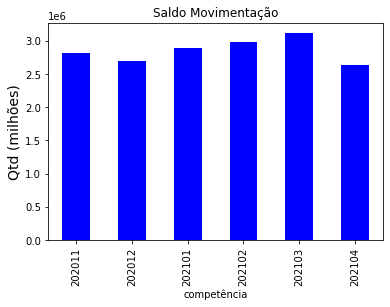

In [22]:
movimentacao.query('saldomovimentação != 0').groupby('competência').size().plot(kind='bar', color='BLUE',title = 'Saldo Movimentação').set_ylabel('Qtd (milhões)',fontsize=14),


In [23]:
movimentacao.query('saldomovimentação != 0').groupby('competência').size().sort_values(ascending=False)


competência
202103    3119136
202102    2987569
202101    2891485
202011    2822209
202012    2699295
202104    2642599
dtype: int64

In [24]:
troca_movimentacao = {10:'Admissão', 20:'Admissão', 25:'Admissão', 35:'Admissão', 70:'Admissão', 31:'Demissão', 32:'Demissão', 33:'Demissão', 40:'Demissão', 43:'Demissão', 45:'Demissão', 50:'Demissão', 60:'Demissão', 80:'Demissão', 90:'Demissão', 98:'Demissão', 99:'Não Identificado'}
movimentacao['tipomovimentação'] = movimentacao['tipomovimentação'].apply(lambda x: troca_movimentacao[x])

In [25]:
movimentacao.sample(10)

,competência,seção,saldomovimentação,graudeinstrução,idade,raçacor,sexo,tipomovimentação,salário
2164074,202101,G,1,4,42.0,1,3,Admissão,1447.439941
1432344,202102,G,1,7,30.0,1,1,Admissão,1524.150024
2852292,202103,N,-1,5,45.0,3,1,Demissão,2912.000000
670525,202102,C,-1,9,28.0,1,3,Demissão,1376.290039
277887,202011,G,1,7,26.0,1,3,Admissão,1278.000000
2948941,202102,C,-1,7,24.0,6,1,Demissão,908.000000
2333112,202012,J,-1,9,36.0,1,3,Demissão,6100.000000
2063650,202104,E,1,7,37.0,3,1,Admissão,2800.000000
1847123,202011,I,1,7,27.0,1,3,Admissão,1326.000000
244916,202011,Q,-1,9,47.0,6,3,Demissão,1069.709961


Text(0, 0.5, 'Qtd (milhões)')

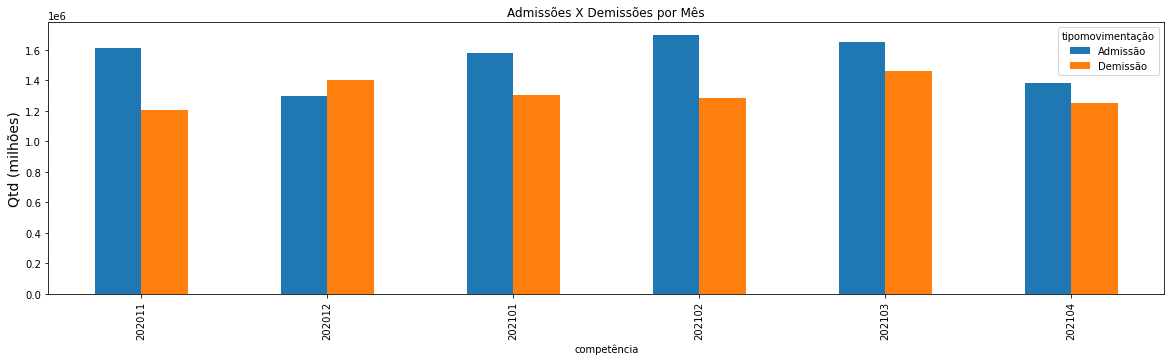

In [26]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
        'tipomovimentação']).size().unstack().plot(kind='bar', 
                figsize = (20,5),title = 'Admissões X Demissões por Mês').set_ylabel('Qtd (milhões)',fontsize=14)


In [27]:
troca_sexo = {1:'Homem', 3:'Mulher', 9: 'Não Identificado'}
movimentacao['sexo'] = movimentacao['sexo'].apply(lambda x: troca_sexo[x])

(Text(0, 0.5, 'Qtd (milhões)'),)

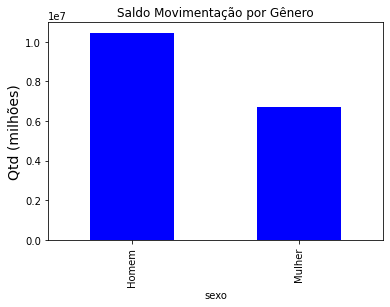

In [28]:
movimentacao.query('saldomovimentação != 0').groupby('sexo').size().sort_values(ascending=False).plot(kind='bar', color='BLUE',title = 'Saldo Movimentação por Gênero').set_ylabel('Qtd (milhões)',fontsize=14),


(Text(0, 0.5, 'Qtd (milhões)'),)

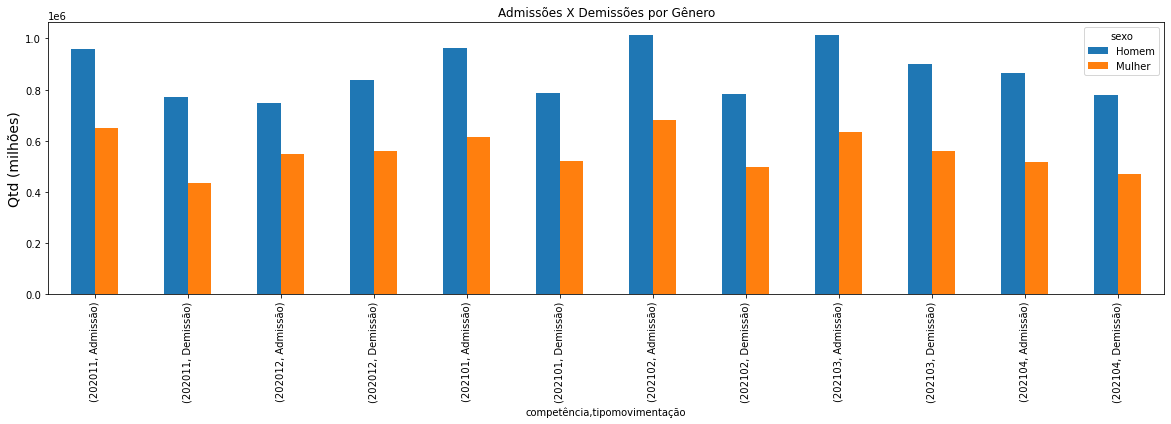

In [29]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
                       'tipomovimentação', 'sexo']).size().unstack().plot(kind='bar', figsize = (20,5),
                                title = 'Admissões X Demissões por Gênero').set_ylabel('Qtd (milhões)',fontsize=14),


In [30]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
                       'tipomovimentação', 'sexo']).size().sort_values(ascending=False)


competência  tipomovimentação  sexo  
202102       Admissão          Homem     1012750
202103       Admissão          Homem     1012537
202101       Admissão          Homem      961121
202011       Admissão          Homem      958783
202103       Demissão          Homem      899829
202104       Admissão          Homem      865511
202012       Demissão          Homem      838375
202101       Demissão          Homem      785915
202102       Demissão          Homem      781586
202104       Demissão          Homem      779523
202011       Demissão          Homem      772274
202012       Admissão          Homem      748270
202102       Admissão          Mulher     681854
202011       Admissão          Mulher     651607
202103       Admissão          Mulher     635707
202101       Admissão          Mulher     613692
202103       Demissão          Mulher     560631
202012       Demissão          Mulher     560377
             Admissão          Mulher     546562
202101       Demissão          

(Text(0, 0.5, 'Qtd'),)

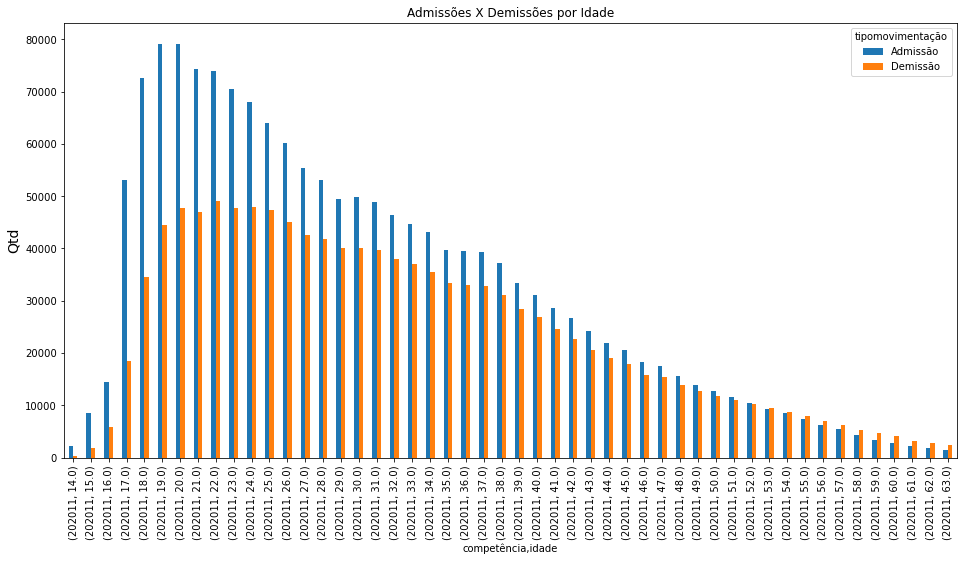

In [31]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
                       'idade','tipomovimentação']).size().head(100).unstack().plot(kind='bar',figsize=(16,8),
                        title = 'Admissões X Demissões por Idade').set_ylabel('Qtd',fontsize=14),


In [32]:
troca_escolaridade = {1:'Analfabeto', 2:'Fundamental 1 Incompleto', 3:'Fundamental 1 Completo', 4: 'Fundamental 2 Incompleto', 5: 'Fundamental 2 Completo', 6: 'Médio Incompleto', 7: 'Médio Completo', 8: 'Superior Incompleto',9: 'Superior Completo', 10:'Mestrado', 11:'Doutorado', 80:'Pós Graduado', 99:'Não Identificado'}
movimentacao['graudeinstrução'] = movimentacao['graudeinstrução'].apply(lambda x: troca_escolaridade[x])

Text(0, 0.5, 'Qtd (milhões)')

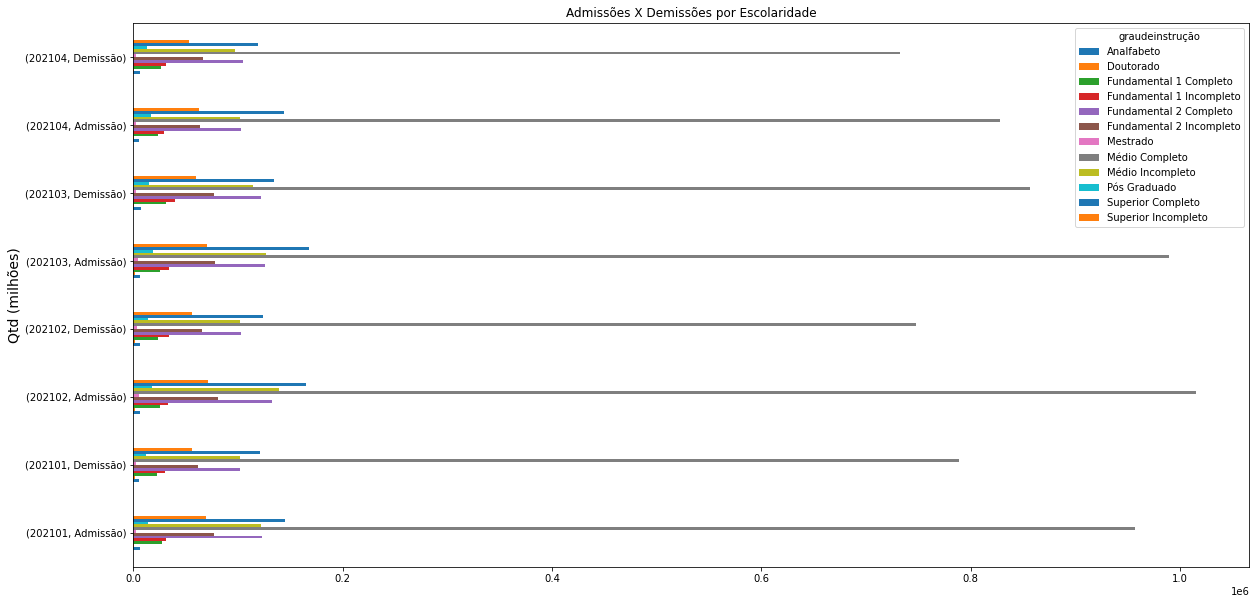

In [326]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
                       'graudeinstrução','tipomovimentação']).size().sort_values(ascending=False).unstack(1).plot(kind='barh',
                                    title = 'Admissões X Demissões por Escolaridade', figsize=(20,10)).set_ylabel('Qtd (milhões)',fontsize=14)

In [315]:
movimentacao.query('tipomovimentação != "Não Identificado"').groupby(['competência',
                       'graudeinstrução','tipomovimentação']).size().sort_values(ascending=False)

competência  graudeinstrução  tipomovimentação
202102       Médio Completo   Admissão            1015682
202103       Médio Completo   Admissão             989601
202101       Médio Completo   Admissão             956974
202103       Médio Completo   Demissão             856289
202104       Médio Completo   Admissão             827938
                                                   ...   
202101       Doutorado        Demissão               1095
202104       Doutorado        Admissão                982
202103       Doutorado        Demissão                943
202101       Doutorado        Admissão                808
202104       Doutorado        Demissão                699
Length: 96, dtype: int64